In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("../../data/comments_posts_transcripts.csv")

In [3]:
df.columns

Index(['post_id', 'text', 'textLanguage', 'createTimeISO', 'isAd',
       'author_nickName', 'author_signature', 'author_fans', 'video_duration',
       'webVideoUrl', 'diggCount', 'shareCount', 'playCount', 'collectCount',
       'commentCount', 'isSponsored', 'searchHashtag_name',
       'searchHashtag_views', 'location_address', 'comment_id',
       'comment_createTimeISO_comment', 'comment', 'diggCount_comment',
       'replyCommentTotal_comment', 'uniqueId_comment', 'detected_language',
       'transcribed_text', 'video_description', 'bucketUrl', 'date',
       'comment_lang'],
      dtype='object')

In [32]:
df

,post_id,text,textLanguage,createTimeISO,isAd,author_nickName,author_signature,author_fans,video_duration,webVideoUrl,...,comment,diggCount_comment,replyCommentTotal_comment,uniqueId_comment,detected_language,transcribed_text,video_description,bucketUrl,date,comment_lang
0,7479597326806371589,My skincare routine IG:paulinabussani #skincar...,en,2025-03-09 00:17:51+00:00,False,Paulina Bussani,🇲🇽📍🇦🇪\nSu sobrecargo de confianza ✈️\n📩: spaul...,216700,89,https://www.tiktok.com/@paulinabussani/video/7...,...,Do you have to have other work experience to b...,0,0.0,call1_me_lalie,en,[Music],A woman shows her skincare routine in this vid...,https://storage.cloud.google.com/capstone-soci...,2025-03-09,en
1,7479597326806371589,My skincare routine IG:paulinabussani #skincar...,en,2025-03-09 00:17:51+00:00,False,Paulina Bussani,🇲🇽📍🇦🇪\nSu sobrecargo de confianza ✈️\n📩: spaul...,216700,89,https://www.tiktok.com/@paulinabussani/video/7...,...,😍😍😍 Amo,1,0.0,fatreyescantillo,en,[Music],A woman shows her skincare routine in this vid...,https://storage.cloud.google.com/capstone-soci...,2025-03-09,en
2,7479597326806371589,My skincare routine IG:paulinabussani #skincar...,en,2025-03-09 00:17:51+00:00,False,Paulina Bussani,🇲🇽📍🇦🇪\nSu sobrecargo de confianza ✈️\n📩: spaul...,216700,89,https://www.tiktok.com/@paulinabussani/video/7...,...,Impressed by your content! For collaboration D...,0,0.0,gl_serina,en,[Music],A woman shows her skincare routine in this vid...,https://storage.cloud.google.com/capstone-soci...,2025-03-09,en
3,7479597326806371589,My skincare routine IG:paulinabussani #skincar...,en,2025-03-09 00:17:51+00:00,False,Paulina Bussani,🇲🇽📍🇦🇪\nSu sobrecargo de confianza ✈️\n📩: spaul...,216700,89,https://www.tiktok.com/@paulinabussani/video/7...,...,"hello prettyy, we're really impressed by your ...",0,0.0,eelry.elena,en,[Music],A woman shows her skincare routine in this vid...,https://storage.cloud.google.com/capstone-soci...,2025-03-09,en
4,7479597326806371589,My skincare routine IG:paulinabussani #skincar...,en,2025-03-09 00:17:51+00:00,False,Paulina Bussani,🇲🇽📍🇦🇪\nSu sobrecargo de confianza ✈️\n📩: spaul...,216700,89,https://www.tiktok.com/@paulinabussani/video/7...,...,"Wow , we love how you styled your outfit💎! Our...",0,0.0,brandmanager_sarah,en,[Music],A woman shows her skincare routine in this vid...,https://storage.cloud.google.com/capstone-soci...,2025-03-09,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30462,7507668384826379576,Its time to say bye bye to black heads 🧼 and h...,en,2025-05-23 15:47:47+00:00,False,Makeup Tutorials | Reviews,Makeup tutorials and reviews💄\ndariia@caagency...,44600,21,https://www.tiktok.com/@idareen_/video/7507668...,...,Off topic but can I PLEASE know what your ligh...,4,3.0,sols00f_campus,NaN,NaN,NaN,NaN,2025-05-23,en
30463,7507668384826379576,Its time to say bye bye to black heads 🧼 and h...,en,2025-05-23 15:47:47+00:00,False,Makeup Tutorials | Reviews,Makeup tutorials and reviews💄\ndariia@caagency...,44600,21,https://www.tiktok.com/@idareen_/video/7507668...,...,It works yall,63,1.0,sukkspooks,NaN,NaN,NaN,NaN,2025-05-23,en
30464,7507668384826379576,Its time to say bye bye to black heads 🧼 and h...,en,2025-05-23 15:47:47+00:00,False,Makeup Tutorials | Reviews,Makeup tutorials and reviews💄\ndariia@caagency...,44600,21,https://www.tiktok.com/@idareen_/video/7507668...,...,Woww the difference 😍😍,31,1.0,sewargharz,NaN,NaN,NaN,NaN,2025-05-23,en
30465,7507668384826379576,Its time to say bye bye to black heads 🧼 and h...,en,2025-05-23 15:47:47+00:00,False,Makeup Tutorials | Reviews,Makeup tutorials and reviews💄\ndariia@caagency...,44600,21,https://www.tiktok.com/@idareen_/video/7507668...,...,"Possible picture outside the house, can please...",9,0.0,t.1zio9,NaN,NaN,NaN,NaN,2025-05-23,en


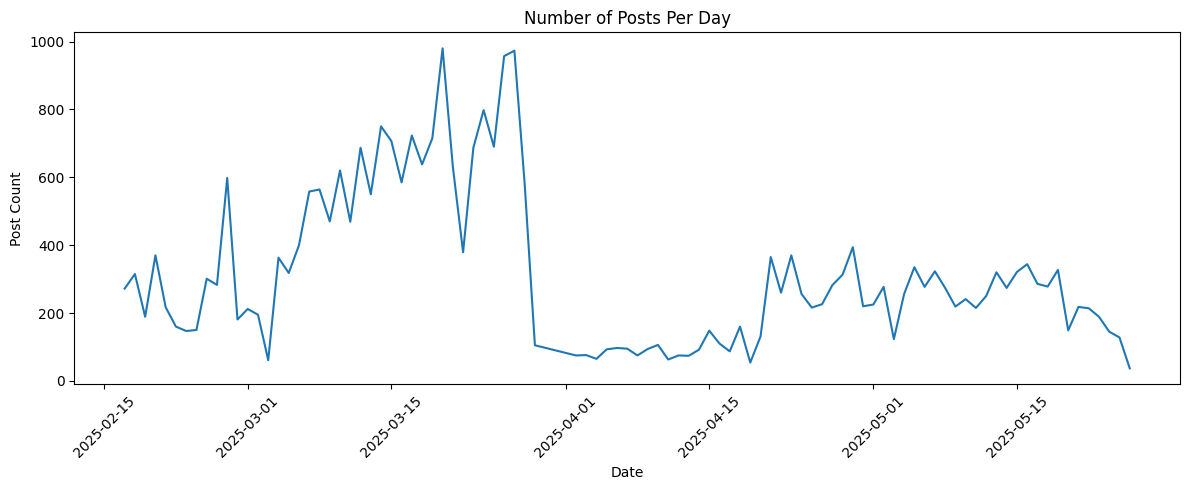

In [4]:
# Ensure createTimeISO is UTC-aware
df["createTimeISO"] = pd.to_datetime(df["createTimeISO"], utc=True, errors="coerce")

# Use UTC-aware filter date
start_date = pd.Timestamp("2025-01-01", tz="UTC")

# Filter
mask = df["createTimeISO"] >= start_date

# Count posts per day
posts_per_day = df.loc[mask, "createTimeISO"].dt.date.value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 5))
posts_per_day.plot()
plt.title("Number of Posts Per Day")
plt.xlabel("Date")
plt.ylabel("Post Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
df2 = pd.read_csv("../../data/posts_transcripts.csv")

In [6]:
df2.columns




Index(['post_id', 'text', 'textLanguage', 'createTimeISO', 'isAd',
       'author_nickName', 'author_signature', 'author_fans', 'video_duration',
       'webVideoUrl', 'diggCount', 'shareCount', 'playCount', 'collectCount',
       'commentCount', 'isSponsored', 'searchHashtag_name',
       'searchHashtag_views', 'location_address', 'detected_language',
       'transcribed_text', 'video_description', 'bucketUrl', 'date'],
      dtype='object')

In [7]:
import pandas as pd

# Step 1: Convert date to datetime
df2['date'] = pd.to_datetime(df2['date'])

# Step 2: Add week and month columns
df2['week'] = df2['date'].dt.isocalendar().week
df2['month'] = df2['date'].dt.to_period('M')

# Step 3: Define an engagement score
df2['engagement'] = df2['diggCount'] + df2['shareCount'] + df2['commentCount'] + df2['collectCount']

# Step 4: Get top 5 videos per week
top5_weekly = (
    df2.sort_values(['week', 'playCount', 'engagement'], ascending=[True, False, False])
      .groupby('week')
      .head(5)
      .reset_index(drop=True)
)

# Step 5: Get top 5 videos per month
top5_monthly = (
    df2.sort_values(['month', 'playCount', 'engagement'], ascending=[True, False, False])
      .groupby('month')
      .head(5)
      .reset_index(drop=True)
)


top5_weekly[top5_weekly['week']==8]

,post_id,text,textLanguage,createTimeISO,isAd,author_nickName,author_signature,author_fans,video_duration,webVideoUrl,...,searchHashtag_views,location_address,detected_language,transcribed_text,video_description,bucketUrl,date,week,month,engagement
0,7474632602004065558,actual results : ...,en,2025-02-23 15:12:05+00:00,False,manel,"pigeonne, bronzée, parle trop, vite\n\nmanel_m...",358500,87,https://www.tiktok.com/@manelparletrop/video/7...,...,598900000000,NaN,No,No transcription.,"Watch a woman go through a detailed process, s...",https://storage.cloud.google.com/capstone-soci...,2025-02-23,8,2025-02,2862800
1,7473230663089622318,In 2 weeks?????🥹 Product name : @SKIN1004 US T...,en,2025-02-19 20:32:14+00:00,False,Skincarebyshade,https://www.amazon.com/dp/B0DNMJDMTW,121500,21,https://www.tiktok.com/@skin_carebyshade/video...,...,656700000000,NaN,English,two steps ahead. I am always two steps ahead.,A woman with braided hair is applying a tone-b...,https://storage.cloud.google.com/capstone-soci...,2025-02-19,8,2025-02,1784000
2,7473877998098320662,Réponse à @🇹🇴 WHY ? #morningroutine #mornings...,en,2025-02-21 14:23:51+00:00,False,𝐾’🪩,🫶🏼☁️🩰✨🧖🏽‍♀️🪩,37800,62,https://www.tiktok.com/@kalck9/video/747387799...,...,157300000000,NaN,NaN,NaN,NaN,NaN,2025-02-21,8,2025-02,2331700
3,7473529835084582152,Don't forget to add this ampoule to your routi...,en,2025-02-20 15:52:47+00:00,False,heylina,"Beauty│Skincare│Lifestyle\n\n📍Seoul, Korea\n💌h...",111300,16,https://www.tiktok.com/@heylina2484/video/7473...,...,251400000,NaN,English,two steps ahead. I am always two steps ahead.,A woman shares how she is using a clear serum ...,https://storage.cloud.google.com/capstone-soci...,2025-02-20,8,2025-02,954895
4,7472426157053349142,night routine ☁️ #skincare #skincareroutine #g...,en,2025-02-17 16:29:56+00:00,True,Fanny | skincare & ASMR ☁️,contact: fanny@eliotmgmt.com 🫦,6100000,29,https://www.tiktok.com/@by.fannys/video/747242...,...,656700000000,NaN,English,[Music],A woman with a towel wrapped around her hair d...,https://storage.cloud.google.com/capstone-soci...,2025-02-17,8,2025-02,258680


In [8]:
df3=pd.read_csv("../../data/keywords.csv")

In [9]:
df3.columns

Index(['date', 'keyword', 'tfidf_score', 'mentions'], dtype='object')

In [10]:
df3

,date,keyword,tfidf_score,mentions
0,2025-04-28/2025-05-04,skincare routine,1.0074,10
1,2025-04-28/2025-05-04,aloe vera,0.6469,6
2,2025-04-28/2025-05-04,skin skin,0.5538,6
3,2025-05-05/2025-05-11,skin care,1.8686,16
4,2025-05-05/2025-05-11,skincare routine,1.8643,28
5,2025-05-05/2025-05-11,type girl,1.7449,5
6,2025-05-05/2025-05-11,pretty baby,1.6402,8
7,2025-05-05/2025-05-11,hours telling,1.3726,7
8,2025-05-05/2025-05-11,sit hours telling,1.3726,7
9,2025-05-05/2025-05-11,flowers sit hours,1.3726,7


In [11]:
df4=pd.read_csv("/Users/ritushetkar/Downloads/dummy_topic.csv")

In [12]:
df6=pd.read_csv("/Users/ritushetkar/env_capstone/data/top5_weekly.csv")

In [13]:
df6.columns

Index(['post_id', 'text', 'textLanguage', 'createTimeISO', 'isAd',
       'author_nickName', 'author_signature', 'author_fans', 'video_duration',
       'diggCount', 'shareCount', 'playCount', 'collectCount', 'commentCount',
       'isSponsored', 'searchHashtag_name', 'searchHashtag_views',
       'location_address', 'detected_language', 'transcribed_text',
       'video_description', 'bucketUrl', 'date', 'week', 'month'],
      dtype='object')

In [14]:
#caffinate it 

In [15]:
df7=pd.read_csv('/Users/ritushetkar/Downloads/dummy_topic.csv')

In [16]:
df7.columns

Index(['Unnamed: 0', 'Topic', 'Words', 'Frequency', 'Timestamp', 'TopicName',
       'Keywords', 'ExampleComments', 'Time', 'Proportion'],
      dtype='object')

In [18]:
df7.head()

,Unnamed: 0,Topic,Words,Frequency,Timestamp,TopicName,Keywords,ExampleComments,Time,Proportion
0,68,0,"hating, yall, 22, yall hating, njz",59,2025-02-24,yall hating beautiful girl lisa comments talki...,yall hating beautiful girl lisa comments talki...,"['the way she’s just slowly losing clout …', '...",2025-02-17 00:00:00 – 2025-03-24 00:00:00,0.036020
1,69,1,"wash, cleanser, oil, soap, body",53,2025-02-24,bath soap,cleanser oil cleansing wash oil cleanser clean...,"['Should we wash our face first?', 'this video...",2025-02-17 00:00:00 – 2025-03-24 00:00:00,0.032357
2,196,0,"augenbrauen, lilo, drops routine, troom, remin...",85,2025-03-03,yall hating beautiful girl lisa comments talki...,yall hating beautiful girl lisa comments talki...,"['the way she’s just slowly losing clout …', '...",2025-02-17 00:00:00 – 2025-03-24 00:00:00,0.036765
3,197,1,"bath, cleanser, wash, oil, oil cleanser",86,2025-03-03,bath soap,cleanser oil cleansing wash oil cleanser clean...,"['Should we wash our face first?', 'this video...",2025-02-17 00:00:00 – 2025-03-24 00:00:00,0.037197
4,198,2,"videos, video, vids, love videos, videos love",66,2025-03-03,I love your videos,videos video love videos vids love youtube wat...,['How do I find the videos with your mom? 55 h...,2025-02-17 00:00:00 – 2025-03-24 00:00:00,0.028547


In [33]:
df5=pd.read_csv('/Users/ritushetkar/env_capstone/data/keywords.csv')

In [34]:
df5.columns

Index(['date', 'keyword', 'tfidf_score', 'mentions'], dtype='object')

In [35]:
df5.head()


,date,keyword,tfidf_score,mentions
0,2025-05-04,skincare routine,0.6298,5
1,2025-05-11,skin care,1.8691,16
2,2025-05-11,skincare routine,1.8652,28
3,2025-05-11,type girl,1.7450,5
4,2025-05-11,pretty baby,1.6404,8


In [25]:
fig = px.line(
    df7,
    x="Timestamp",
    y="Proportion",
    color="TopicName",
    hover_data=["Keywords", "ExampleComments"],
    title="Topic Proportion Over Time"
)
fig.show()


In [30]:
df7['ShortKeywords'] = df7['Keywords'].apply(lambda x: x[:60] + "..." if len(str(x)) > 60 else x)
df7['ShortExample'] = df7['ExampleComments'].apply(lambda x: x[:100] + "..." if len(str(x)) > 100 else x)

fig_prop = px.line(
    df7.sort_values("Timestamp"),
    x="Timestamp",
    y="Proportion",
    color="TopicName",
    title="📈 Topic Share Over Time",
    markers=True)
fig_prop.update_layout(
    title_font_size=20,
    hovermode="x unified",
    plot_bgcolor="#f9f9f9"

)